<a href="https://colab.research.google.com/github/nadeeha/play-store-app-review-analysis/blob/main/CH_Nadeeha_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##***“Amazing things will happen when you listen to the consumer.”*** –Jonathan Midenhall, CEO of TwentyFirstCenturyBrand

As rightly said by Ex CMO of AirBnB, Jonathan MidenHall, the key to success of any apps lies with the user and it's use case. And what else could possibly lead to a failure if the brand doesn't listen to the customers? Nothing!

We have been given two datasets:
1. Play Store Data
2. User review Data

Let's dive into the world of App data and see what possible conclusions we could make to increase the app engagement and ensure success by leveraging the power of Python and it's powerful libraries like Pandas, Numpy for Data Manipulation; Matplotlib & Seaborm for beautiful visualisations and several other libraries that could help us throughout journey of data analysis. 

In [166]:
#mount google dribe
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
#lets import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['figure.figsize'] = (13, 7)



#**Preliminary Analysis:**
EDA or Exploratory Data Analysis 
-Let's start by doing a basic EDA on the playstore dataset. First we'll consider this dataset alone. 

# 1. EDA On **Play Store Dataset**



In [168]:
#read the dataset
df_play_store = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Python Module/Capstone Project/Play Store Data.csv')

In [169]:
#first few values of dataset
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [170]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [173]:
#statistical summary of dataset
df_play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##**Inference from Preliminary Analysis:**
Except rating all other columns are in object datatype. There are null values present in the case of some columns which can be dealt with while considering each problem statement.

###1. **Boxplot** of Numeric Data

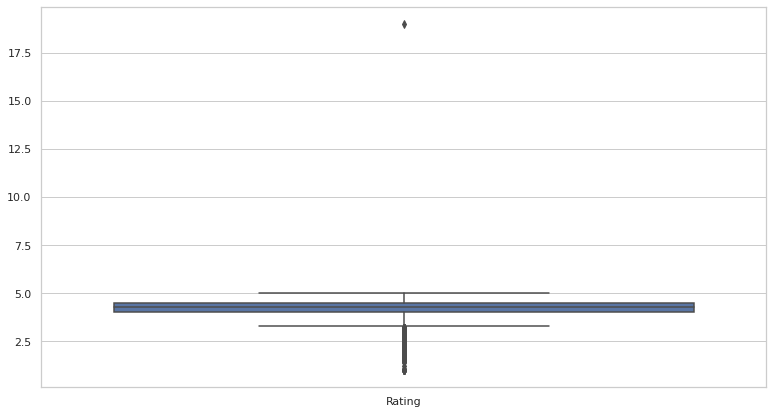

In [174]:
sns.boxplot(data=df_play_store)

**Inference:** The only numeric column was **Rating** and there seems to be an **outliers** in it.

**VISUALISATION OF NULL VALUES:**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

Text(0.5, 0, 'Number of missing values')

Text(0, 0.5, 'column name')

Text(0.5, 1.0, 'Column Name and count of missing values')

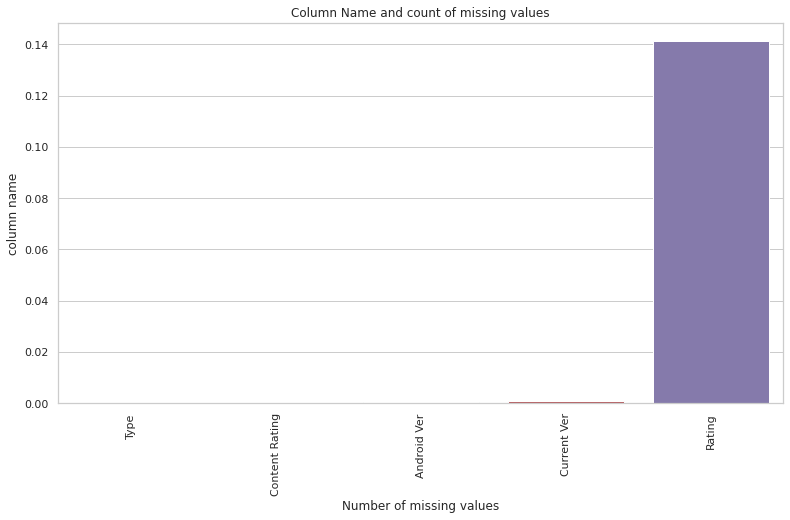

In [187]:
#here the missing values are visualised
missing_values = df_play_store.isnull().sum() / len(df_play_store)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.xlabel('Number of missing values')
plt.ylabel('column name')
plt.title('Column Name and count of missing values')
plt.show()

**Inference**: As suggested by the info of dataset and the visualisation, the Ratings column has the highest number of null values .

##**DATA PREPROCESSING**: Before any analysis, one of the most important task is to preprocess the data so that meaningful inferences can be deducted.

###Dealing with **duplicate values**

In [176]:
#check if df contains duplicates of rows
df_play_store[df_play_store.duplicated()]
df_play_store.duplicated().sum()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


483

In [177]:
#check with a specific app to see how it varies
df_play_store[df_play_store['App']=='Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


**INFERENCE:** On checking for duplicates it was found that there were 483 duplicates. We can drop these to proceed with the analysis.

In [178]:
#drop duplicates
df_play_store = df_play_store.drop_duplicates()
df_play_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##**Analysis of Individual Columns & respective visualisations if any**
 
 

### 1. **App Column**: It contains the name of apps available in Playstore. 

In [11]:
#number of unique values in app column
df_play_store['App'].nunique()

9660

Only **9660 unique counts of Apps** are there, which means there are repetitions amongst these..

In [12]:
#name of apps having repetitions 
df_play_store['App'].value_counts()[:523]

ROBLOX                                   9
8 Ball Pool                              7
Helix Jump                               6
Bubble Shooter                           6
Zombie Catchers                          6
                                        ..
Toca Life: City                          2
Messenger Lite: Free Calls & Messages    2
Game for KIDS: KIDS match'em             2
Moco+ - Chat, Meet People                2
Knife Hit                                2
Name: App, Length: 523, dtype: int64

In [13]:
#checking with one of the repeated apps
df_play_store[df_play_store['App'] == 'ROBLOX'].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


**Inference:** On Checking with few of the columns, its seen that the most of the time **column that varies is reviews and in some cases category** for the same app.

###2. **Size column:** Size column has the size of each apps in MB, KB units etc. It may have to be converted to float for further analysis.

In [179]:
#check for count of each values
df_play_store['Size'].value_counts()

Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
411k                     1
772k                     1
551k                     1
208k                     1
874k                     1
Name: Size, Length: 462, dtype: int64

**Inference:** Since there seems to be an ambiguity in the file size type units, it's better to dig up into the subsets and verify the units before moving further.

In [180]:
#column has M --> MB in size
df_play_store[df_play_store['Size'].str.contains('M')][['Size']].head(3)

,Size
0,19M
1,14M
2,8.7M


In [16]:
#column has varies with size 
df_play_store[df_play_store['Size']=='Varies with device'][['Size']].head(3)

,Size
37,Varies with device
42,Varies with device
52,Varies with device


In [17]:
#column has M --> KB in size
df_play_store[df_play_store['Size'].str.contains('k')][['Size']].head(3)

,Size
58,201k
209,23k
384,79k


In [181]:
#column that doesn't belong to any of those specified format
df_play_store[~((df_play_store['Size'].str.contains('M')) | (df_play_store['Size']=='Varies with device') | (df_play_store['Size'].str.contains('k')))][['Size']].head(3)

,Size
10472,"1,000+"


**Inference:**We can safely assume that the 4 formats of units are in **M,K,+**and some are tagged as **Varies with device**.

In [182]:
#A function is defined to account for these units so that it could be converted to float
def return_size_new(input_str):
  '''
  func to convert size to float
  '''
  if input_str[-1] == 'M':
    input_str =input_str.replace('M','e6')
  elif input_str[-1] == 'k':
    input_str=input_str.replace('k',',e3')
  elif input_str == 'Varies with device':
    input_str=input_str.replace('Varies with device','0')
  else:
    input_str =input_str.replace('+','')
  if input_str.find(','):
    input_str=input_str.replace(',','')
  return input_str

In [183]:
#func applied on each row
df_play_store['size_new'] = df_play_store['Size'].apply(lambda x: return_size_new(x))
df_play_store['size_new'] = df_play_store['size_new'].astype(float)
df_play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_new
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000.0


In [184]:
#checking for various size formats value counts 
df_play_store['size_new'].value_counts()
bins = [0,1,1000000,10000000,100000000]
df_plot = df_play_store['size_new'].value_counts(bins=bins, sort=False).to_frame()
df_plot = df_plot.reset_index()
df_plot

0.0           1526
11000000.0     188
13000000.0     186
12000000.0     186
14000000.0     182
              ... 
429000.0         1
97000.0          1
412000.0         1
544000.0         1
811000.0         1
Name: size_new, Length: 461, dtype: int64

,index,size_new
0,"(-0.001, 1.0]",1526
1,"(1.0, 1000000.0]",322
2,"(1000000.0, 10000000.0]",3674
3,"(10000000.0, 100000000.0]",4836


###Plot 1: **Number of Apps** in different **file size range**

([<matplotlib.axis.XTick at 0x7f4daa4ef410>,
 [Text(0, 0, 'Varies with Device'),
  Text(0, 0, '1KB-1MB'),
  Text(0, 0, '1MB-10MB'),
  Text(0, 0, '10MB-100MB')])

Text(0.5, 0, 'Size of App')

Text(0, 0.5, 'Number of Apps')

Text(0.5, 1.0, 'Number of Apps v/s Size of App')

<Figure size 576x360 with 0 Axes>

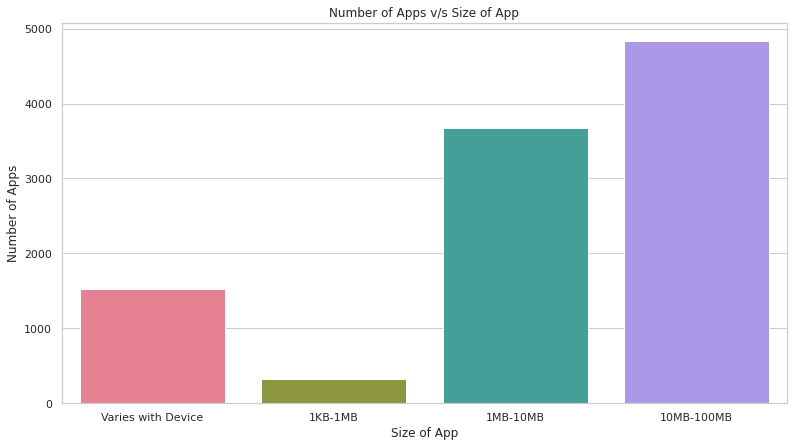

<Figure size 576x360 with 0 Axes>

In [22]:
#plot for number of apps in different file size range
ax = sns.barplot(y="size_new",x="index", data=df_plot, palette='husl')
positions = (0,1, 2, 3)
labels = ('Varies with Device','1KB-1MB','1MB-10MB','10MB-100MB')
plt.xticks(positions, labels)
plt.xlabel('Size of App')
plt.ylabel('Number of Apps')
plt.title('Number of Apps v/s Size of App')
plt.figure(figsize = (8,5))
plt.show()


**Inference:**There are more apps in range of 10MB-100MB than any category

In [185]:
#max, min and average sizes
df_play_store['size_new'].max(),df_play_store[df_play_store['size_new']!=0]['size_new'].min(),np.mean(df_play_store['size_new'])

(100000000.0, 1000.0, 18149494.06256034)

###2. **Installs column:** Install column has the number of installs for each app. The datatype is object and may have to convert to float for further processing.

In [186]:
#number of unique values and its count
df_play_store['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

##**Plot 2:** Number of Installs and its respective number of apps

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Number of Installs')

Text(0, 0.5, 'Number of apps')

Text(0.5, 1.0, 'Number of installs and respective number of apps')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

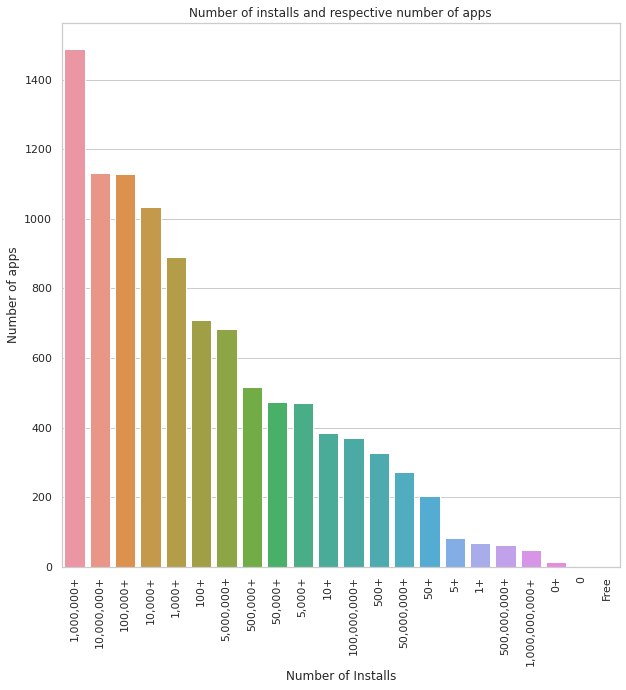

In [188]:
#number of installs v/s num of apps
plt.figure(figsize = (10, 10))
sns.countplot(x="Installs", data=df_play_store,order=df_play_store.Installs.value_counts().index)
plt.xlabel('Number of Installs')
plt.ylabel('Number of apps')
plt.title('Number of installs and respective number of apps')
plt.xticks(rotation=90)

**Inference:** Around **1488** apps have more than **1,000,000+** downloads

##**Plot 3:** Histogram plot of number of installs v/s number of apps

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of installs and density')

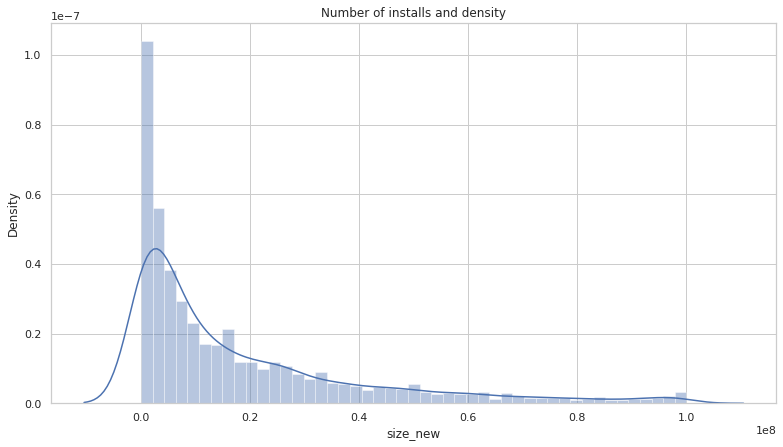

In [189]:
#hist plot of number of installa and its respective count
sns.distplot(df_play_store['size_new'], hist=True)
plt.title('Number of installs and density')

In [190]:
#function to change the installs num to float 
def change_installs_num(input_str):
  if input_str[-1] == '+':
    input_str =input_str.replace('+','')
  elif input_str == 'Free':
    input_str = '-1'
  if input_str.find(','):
    input_str=input_str.replace(',','')
  return input_str
df_play_store['installs_new'] = df_play_store['Installs'].apply(lambda x: change_installs_num(x))

In [191]:
#check the func
df_play_store['installs_new'] = df_play_store['installs_new'].astype(float)
df_play_store[['installs_new','Installs']].head(4)

,installs_new,Installs
0,10000.0,"10,000+"
1,500000.0,"500,000+"
2,5000000.0,"5,000,000+"
3,50000000.0,"50,000,000+"


In [192]:
df_play_store['installs_new'].describe().apply(lambda x: '%.5f' % x)

count         10358.00000
mean       14156392.59761
std        80235800.67957
min              -1.00000
25%            1000.00000
50%          100000.00000
75%         1000000.00000
max      1000000000.00000
Name: installs_new, dtype: object

**Inference:** About 50% of the apps have installs greater than 100K 

###4. **Type Columns:** Type column tells if the app is free or paid.Has one null value.

In [193]:
#value count of type column 
df_play_store.Type.value_counts()

Free    9591
Paid     765
0          1
Name: Type, dtype: int64

In [194]:
#check for nan
df_plot_new= df_play_store[['Type']]
df_plot_new[df_plot_new.isnull().any(axis=1)]

,Type
9148,NaN


In [195]:
#check for value other than2 types
df_plot_new[df_plot_new['Type']=='0']

,Type
10472,0


In [196]:
#dropping null and 0
df_plot_new = df_plot_new.drop(labels=[9148,10472],axis=0)


**Inference:** from the info there was **one null value** and on looking onto it there was another category** 0**, both of which could be dropped

##**Plot 4:** App distribution -Type: Free or Paid

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Type of App - Paid/Free')

Text(0, 0.5, 'Number of apps')

Text(0.5, 1.0, 'Type v/s number of apps')

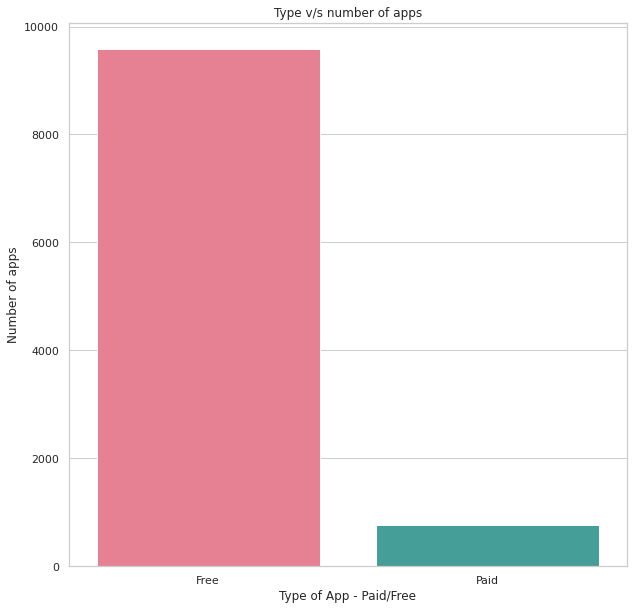

In [197]:
#countplot for type V/s number of apps
plt.figure(figsize = (10, 10))
sns.countplot(x="Type", data=df_plot_new,order=df_plot_new.Type.value_counts().index,palette='husl')
plt.xlabel('Type of App - Paid/Free')
plt.ylabel('Number of apps')
plt.title('Type v/s number of apps')

**Inference:** There are very few paid apps considering the number of apps as a whole

In [200]:
#converted type to 1 Free, 2-- Paid for finding correlations
def type_encoder(Type):
  if Type == 'Free':
    Type = '1'
  elif Type == 'Paid':
    Type = '2'
  
  return Type
df_play_store['type_encoded'] = df_play_store['Type'].apply(lambda x: type_encoder(x))
df_play_store['type_encoded'] = df_play_store['type_encoded'].astype(float)

###5. **Category Column:**Category column has the different categories of apps.No null values.

##**Plot 5:** Number of apps in each category

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Number of apps')

Text(0.5, 1.0, 'Category and respective number of apps')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

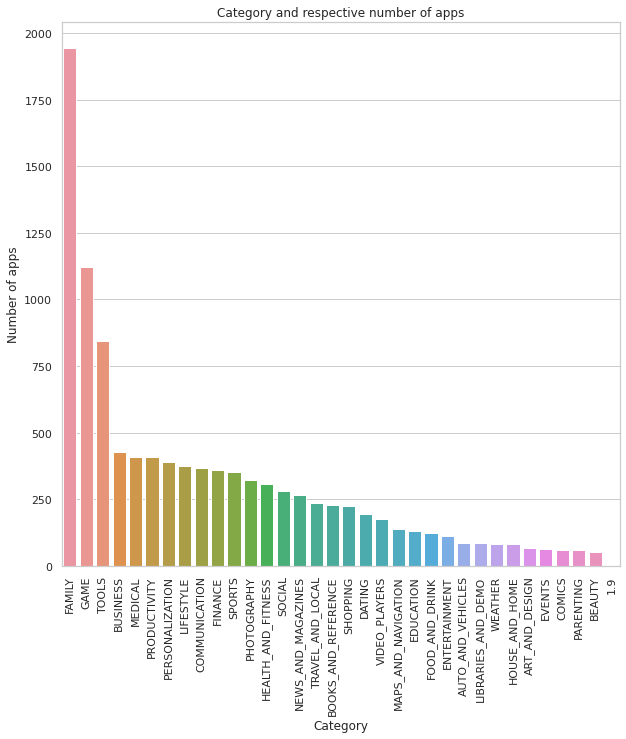

In [201]:
#plot of number of apps in each category 
plt.figure(figsize = (10, 10))
sns.countplot(x="Category", data=df_play_store,order=df_play_store.Category.value_counts().index)
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Category and respective number of apps')
plt.xticks(rotation=90)

**Inference:** The apps that have been most preferred by the developers or are in the playstore belongs to the category of **Family** followed by **Games**

##Final Analysis of numeric columns after conversion from object type using Box plot

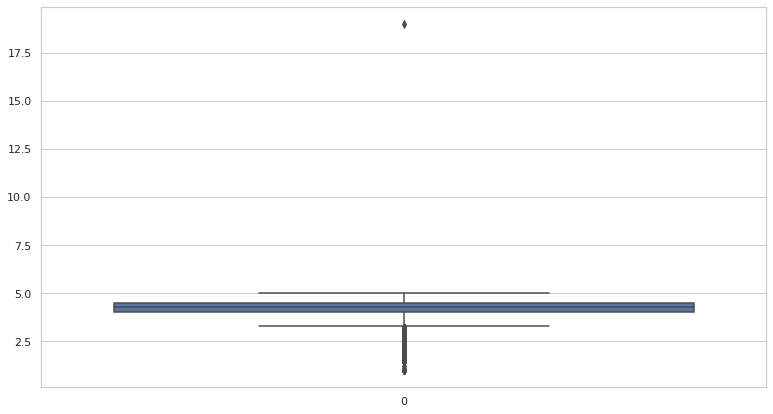

In [204]:
#box plot for newly added numeric columns
sns.boxplot(data=df_play_store['Rating'])

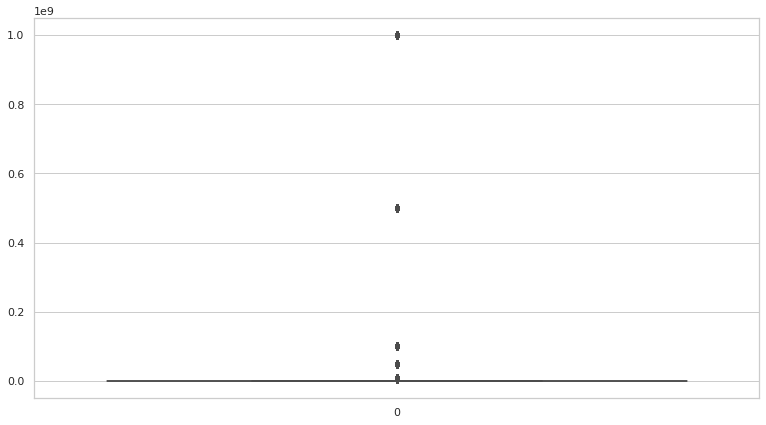

In [205]:
#box plot for newly added numeric columns
sns.boxplot(data=df_play_store['installs_new'])

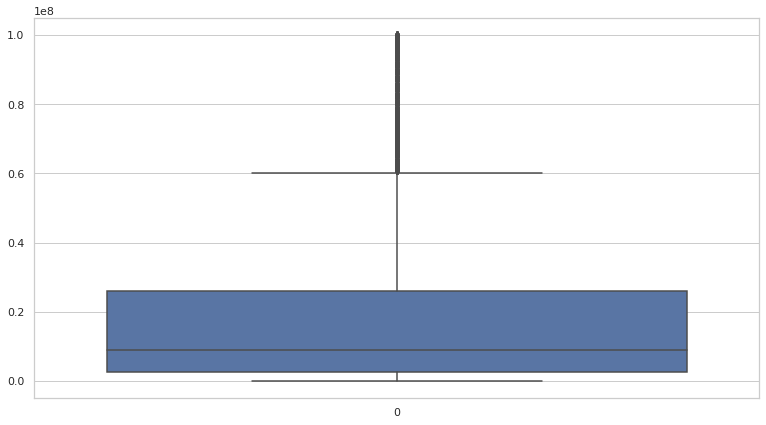

In [206]:
#box plot for newly added numeric columns
sns.boxplot(data=df_play_store['size_new'])

**Inference:** There are outliers in all of the numeric columns

##**Two column** pair wise analysis
Finding if there are any correlations within the data.

In [208]:
#correlation between size and installs after removing outlier
df_play_store_new = df_play_store[['size_new','installs_new']]
df_play_store_new = df_play_store_new[df_play_store_new['size_new']!=0]
df_play_store_new.corr()

,size_new,installs_new
size_new,1.00000,0.16888
installs_new,0.16888,1.00000


**Inference:** slightly positive correlation

In [209]:
#correlation between all cols
corr_df=df_play_store.corr()
corr_df

,Rating,size_new,installs_new,type_encoded
Rating,1.000000,0.042629,0.048147,0.023821
size_new,0.042629,1.000000,0.000298,-0.010871
installs_new,0.048147,0.000298,1.000000,-0.049408
type_encoded,0.023821,-0.010871,-0.049408,1.000000


<Figure size 720x360 with 0 Axes>

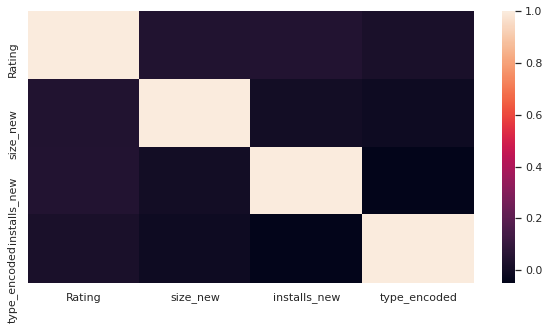

In [210]:
#heatmap of correlations
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

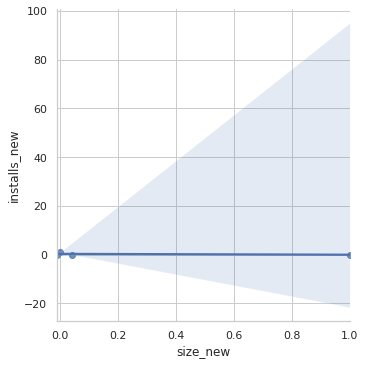

In [211]:
#lmplot for correlation
sns.lmplot(x='size_new', y='installs_new', data=corr_df, fit_reg=True)

**Inference:**Very low or **negligible correlations** only

Category with number of apps

##**Top categories, apps** based on other columns

##**Plot 6:** Categories with most number of installs

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Number of installs')

Text(0.5, 1.0, 'Top 10 category based on number of installs')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

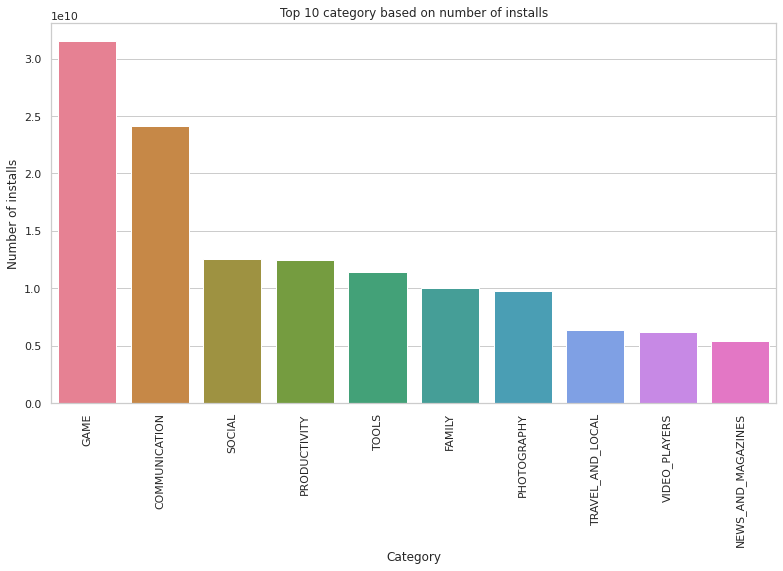

In [213]:
#Category having most number of installs
df_top_cat = df_play_store.groupby(['Category']).agg({'installs_new':'sum'}).reset_index().sort_values(by='installs_new',ascending=False)[:10]
sns.barplot(x="Category", y="installs_new",data=df_top_cat,palette='husl')
plt.xlabel('Category')
plt.ylabel('Number of installs')
plt.title('Top 10 category based on number of installs')
plt.xticks(rotation=90)



##**Plot 6:** Categories with large file sizes

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Avg Size')

Text(0.5, 1.0, 'Top 10 category having high mean size')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

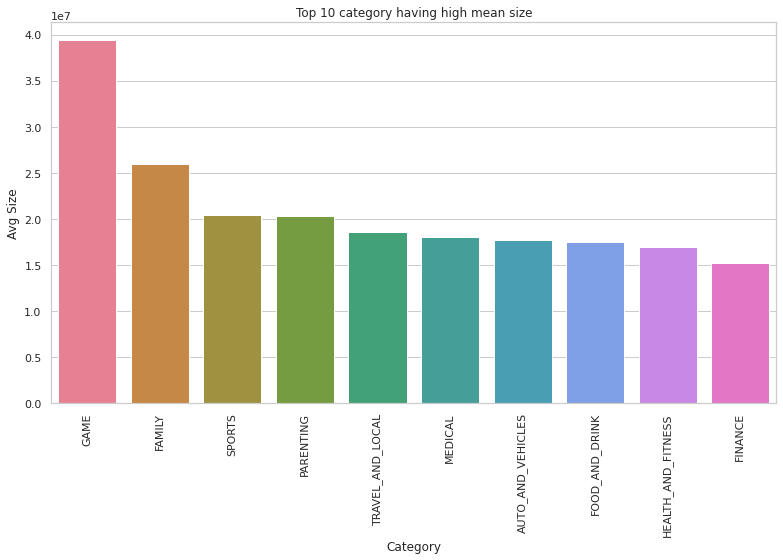

In [214]:
##Category having largest file sizes
df_top_cat = df_play_store.groupby(['Category']).agg({'size_new':'mean'}).reset_index().sort_values(by='size_new',ascending=False)[:10]
sns.barplot(x="Category", y="size_new",data=df_top_cat,palette='husl')
plt.xlabel('Category')
plt.ylabel('Avg Size')
plt.title('Top 10 category having high mean size')
plt.xticks(rotation=90)

##**Plot 6:** Top 30 **Free** apps with most downloads

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

Text(0.5, 1.0, 'Top 30 Free apps with most downloads')

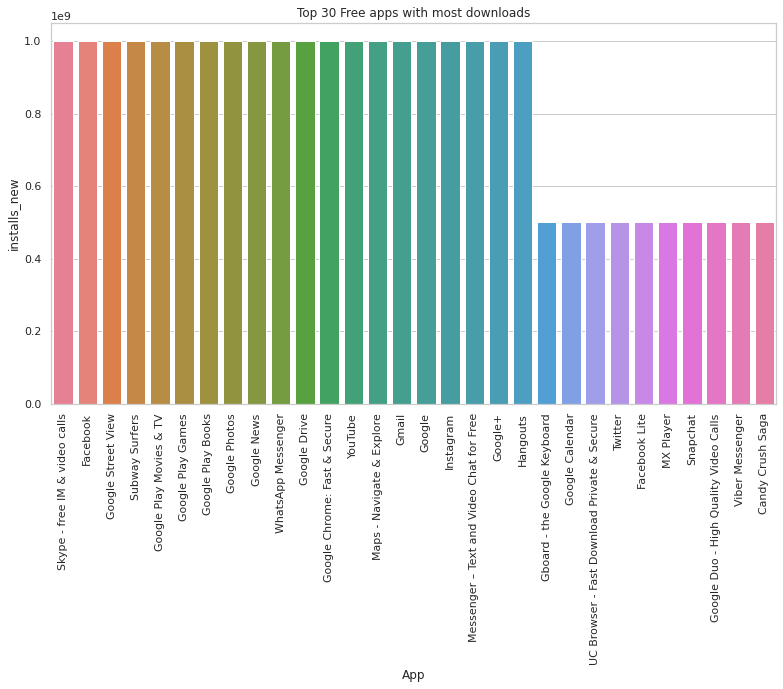

In [216]:
#apps with top downloads via groupby
df_top_app = df_play_store.groupby(['App','Type','installs_new'])['installs_new'].mean().to_frame()
df_top_app.index.names=['App','Type','install']
df_top_app= df_top_app.reset_index()
df_top_app = df_top_app[df_top_app['Type']=='Free'].sort_values(by='installs_new',ascending=False)[:30]
ax = sns.barplot(x="App", y="installs_new", data=df_top_app,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Top 30 Free apps with most downloads')

##**Plot 7:** Top 30 Paid apps with most downloads

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

Text(0.5, 1.0, 'Top 30 Paid apps with most downloads')

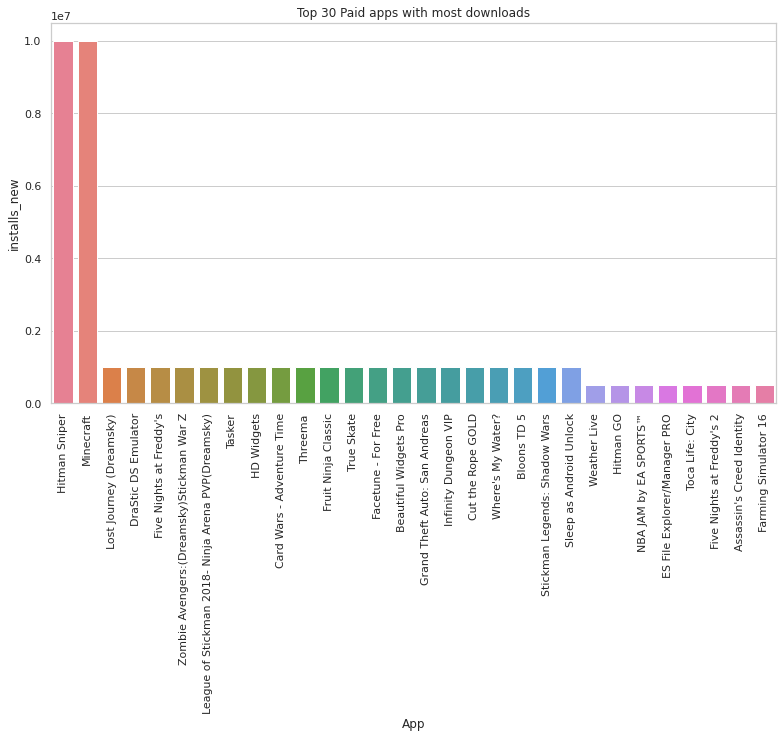

In [217]:
#Top 30 Paid apps with most downloads
df_top_app = df_play_store.groupby(['App','Type','installs_new'])['installs_new'].mean().to_frame()
df_top_app.index.names=['App','Type','install']
df_top_app= df_top_app.reset_index()
df_top_app = df_top_app[df_top_app['Type']=='Paid'].sort_values(by='installs_new',ascending=False)[:30]
ax = sns.barplot(x="App", y="installs_new", data=df_top_app,palette = 'husl')
plt.xticks(rotation=90)
plt.title('Top 30 Paid apps with most downloads')

##**Plot 8:** Top 30 apps with large size

Text(0.5, 0, 'App')

Text(0, 0.5, 'Size')

Text(0.5, 1.0, 'Top 30 apps based on size')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

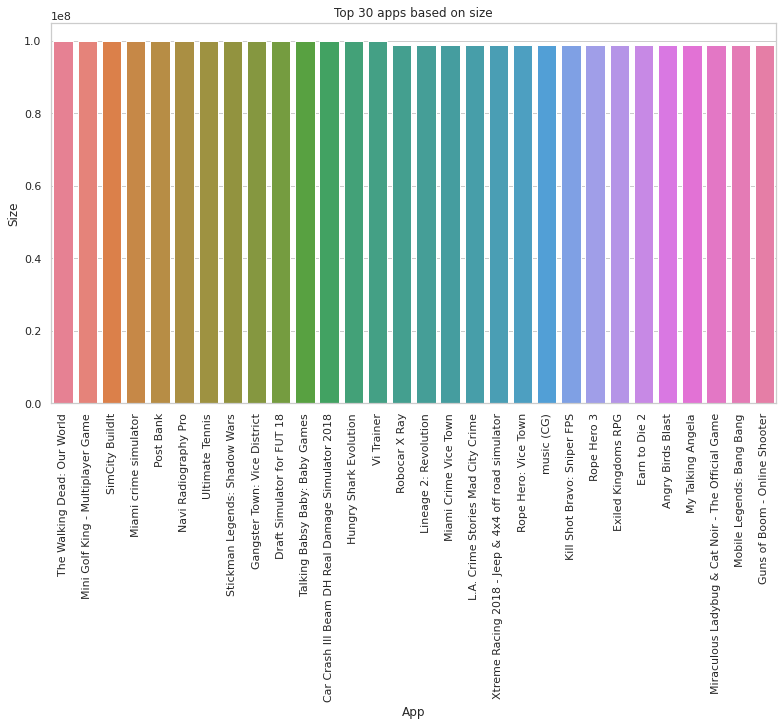

In [218]:
#top 30 apps with large size
df_top_cat = df_play_store.groupby(['App']).agg({'size_new':'max'}).reset_index().sort_values(by='size_new',ascending=False)[:30]
sns.barplot(x="App", y="size_new",data=df_top_cat,palette='husl')
plt.xlabel('App')
plt.ylabel('Size')
plt.title('Top 30 apps based on size')
plt.xticks(rotation=90)

##**Plot 9:** Apps categories by type: Free & paid v/s count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

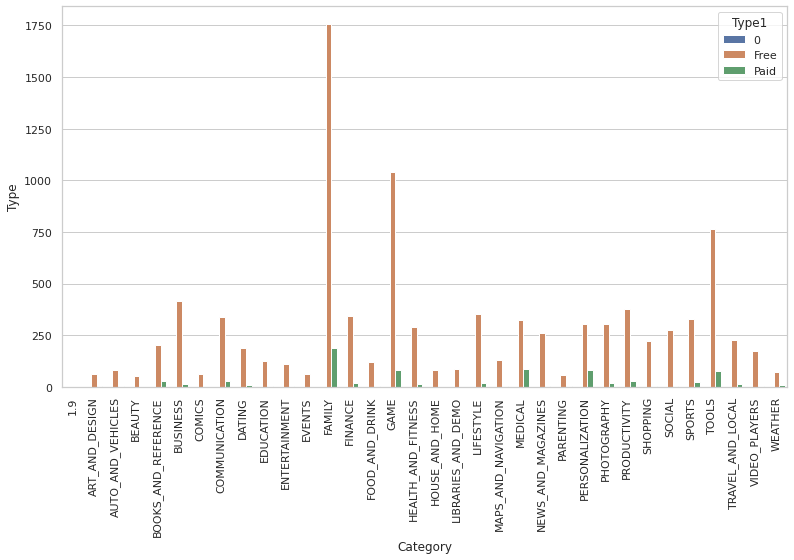

In [219]:
#paid app, free app as per Category count
df = df_play_store.groupby(['Category','Type'])['Type'].count().to_frame()

df.index.names=['Category','Type1']
df = df.reset_index()

ax = sns.barplot(x="Category", y="Type", hue="Type1", data=df,)
plt.xticks(rotation=90)

##Ratings and count

In [221]:
#df subsetted
df_ratings = df_play_store[['Rating','App','Category']]

In [220]:
#taking care of outliers
df_ratings[df_ratings['Rating']>5]
df_ratings = df_ratings.drop(labels=[10472],axis=0)


,Rating,App,Category,Rating_Class


KeyError: ignored

In [223]:
def rat_to_words(input_ratings):
  '''
  function to convert ratings to resp translation
  '''
  if input_ratings >= 4:
    return 'Best Rated'
  elif (input_ratings >= 3) and (input_ratings < 4):
    return 'Average Rated'
  else:
    return 'Worst Rated'

In [224]:
df_ratings.info()
df_ratings = df_ratings.dropna()
df_ratings = df_ratings.drop_duplicates()
df_ratings['Rating_Class'] = df_ratings['Rating'].apply(lambda x: rat_to_words(x) )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    8893 non-null   float64
 1   App       10358 non-null  object 
 2   Category  10358 non-null  object 
dtypes: float64(1), object(2)
memory usage: 643.7+ KB


##**Plot 10:** Count of apps by Ratings 

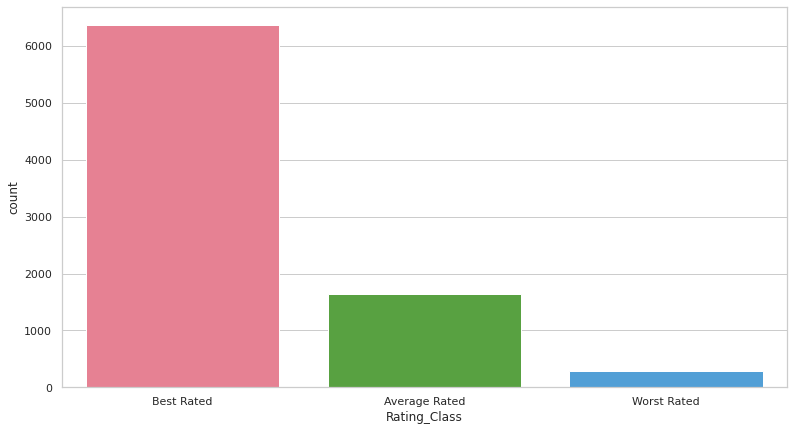

In [226]:
ax = sns.countplot(x="Rating_Class", data=df_ratings, palette='husl')

##**WORD CLOUD!!**


In [227]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


##Word cloud for entire dataframe

(-0.5, 399.5, 199.5, -0.5)

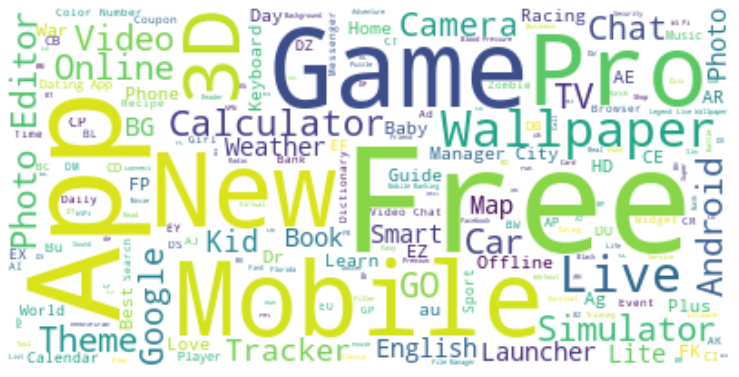

In [231]:
#subsetting df
df_word_cloud = df_play_store[['Category','App']]
text = " ".join(word for word in df_word_cloud.App)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [232]:
#word cloud for each category
def func_select_Category(category_name):
  df_word_cloud = df_play_store[['Category','App']]
  df_word_cloud = df_word_cloud[df_word_cloud['Category']==category_name]
  text = " ".join(word for word in df_word_cloud.App)
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  


#Word cloud for Game Category

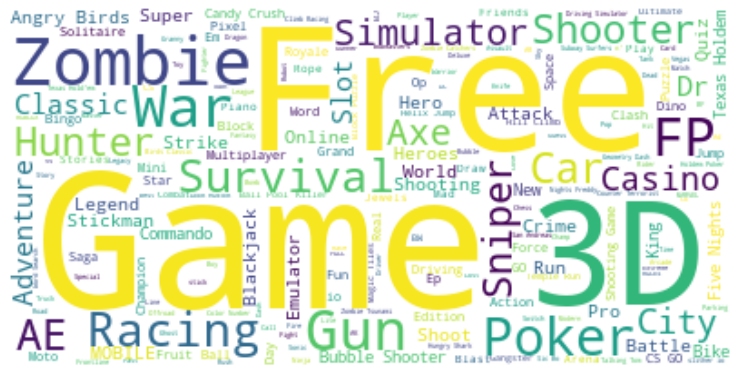

In [233]:
func_select_Category('GAME')

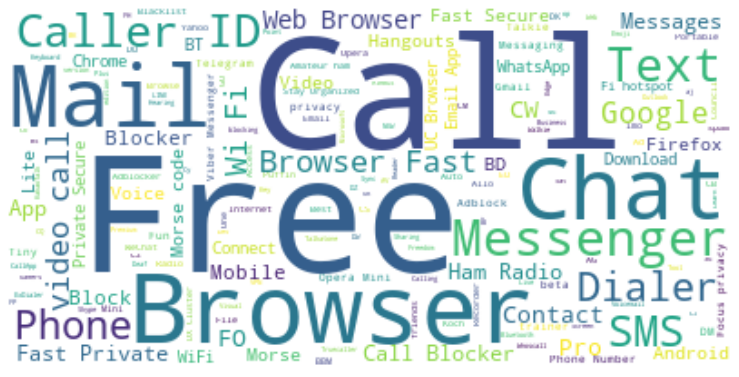

In [234]:
func_select_Category('COMMUNICATION')

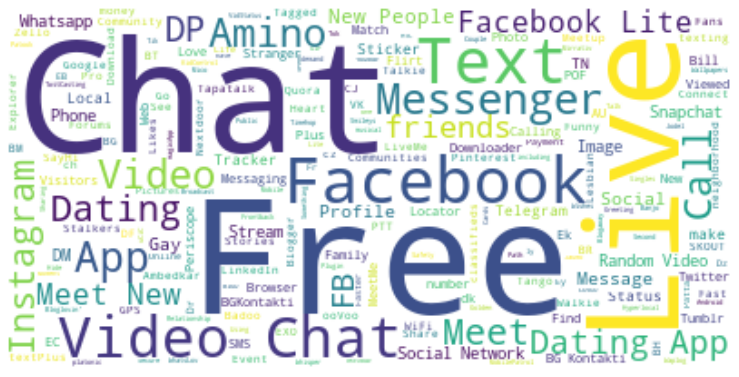

In [235]:
func_select_Category('SOCIAL')

User review dataset EDA

In [65]:
df_user_rating = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Python Module/Capstone Project/User Reviews.csv')

In [66]:
df_user_rating.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [67]:
df_user_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [68]:
df_user_rating.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [76]:
df_user_rating[['Sentiment_Polarity','Sentiment_Subjectivity']].dropna().corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


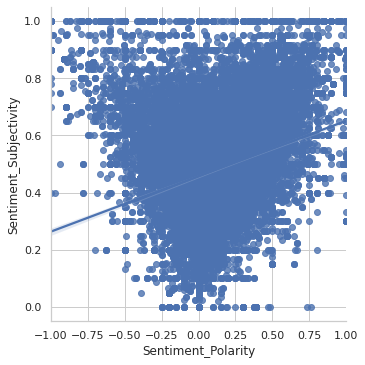

In [77]:
sns.lmplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', data=df_user_rating, fit_reg=True)

Inference: Slightly positive correlation.

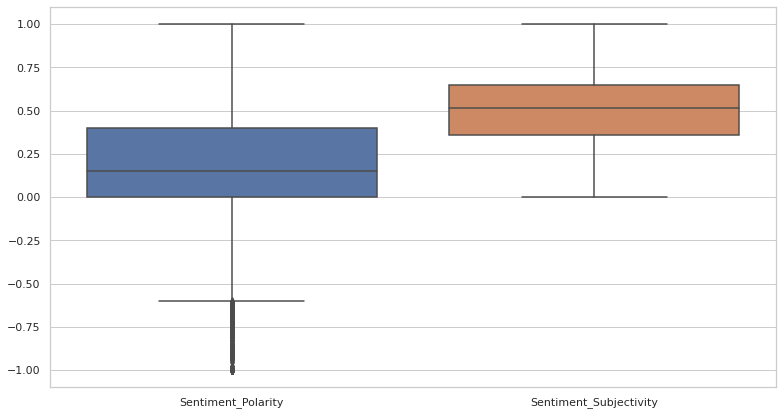

In [78]:
sns.boxplot(data=df_user_rating)

In [89]:
df_sentiment_app = df_user_rating[['App','Sentiment']].dropna()

In [90]:
df_sentiment_app = df_sentiment_app.value_counts().to_frame().reset_index()


In [104]:
df_positive = df_sentiment_app[df_sentiment_app['Sentiment']=='Positive'].sort_values(by=0,ascending=False)[:10]

Text(0.5, 0, 'App')

Text(0, 0.5, 'Number of Positive reviews')

Text(0.5, 1.0, 'Top 10 apps having most number of positive reviews')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

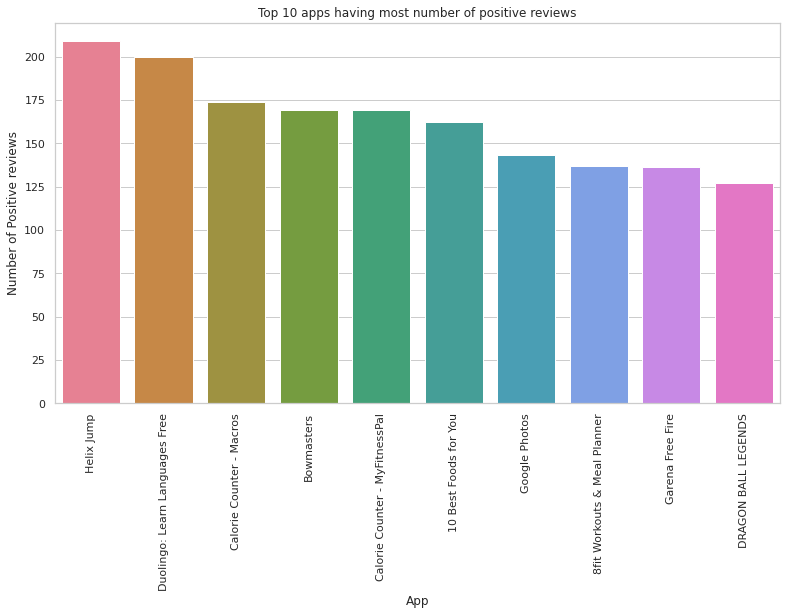

In [105]:
sns.barplot(x="App", y=0,data=df_positive,palette='husl')
plt.xlabel('App')
plt.ylabel('Number of Positive reviews')
plt.title('Top 10 apps having most number of positive reviews')
plt.xticks(rotation=90)

Text(0.5, 0, 'App')

Text(0, 0.5, 'Number of negative reviews')

Text(0.5, 1.0, 'Top 10 apps having most number of negative reviews')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

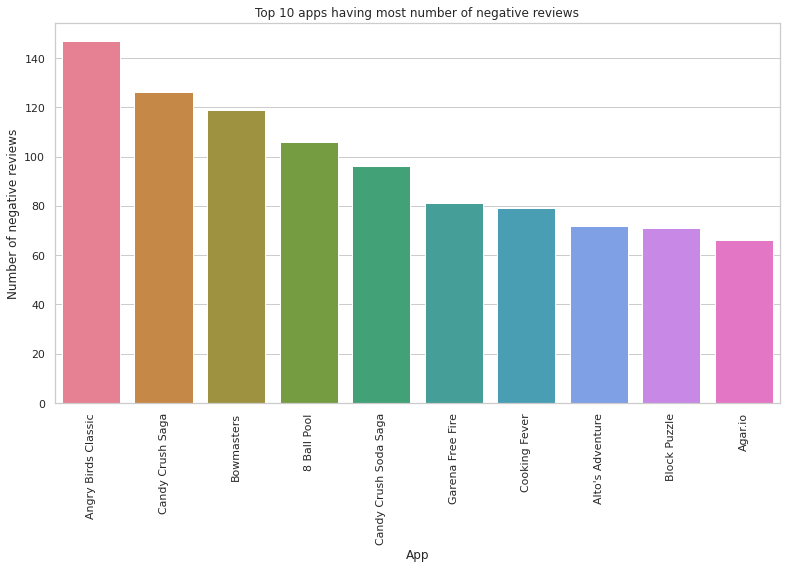

In [106]:
df_negative = df_sentiment_app[df_sentiment_app['Sentiment']=='Negative'].sort_values(by=0,ascending=False)[:10]
sns.barplot(x="App", y=0,data=df_negative,palette='husl')
plt.xlabel('App')
plt.ylabel('Number of negative reviews')
plt.title('Top 10 apps having most number of negative reviews')
plt.xticks(rotation=90)

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Type of Review')

Text(0, 0.5, 'Number of reviews')

Text(0.5, 1.0, 'Type v/s number of reviews')

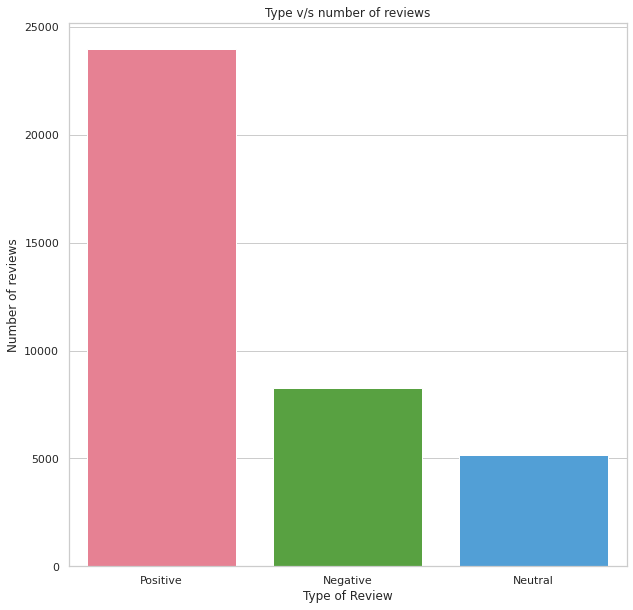

In [110]:
#countplot for type V/s number of apps
plt.figure(figsize = (10, 10))
sns.countplot(x="Sentiment", data=df_user_rating,order=df_user_rating.Sentiment.value_counts().index,palette='husl')
plt.xlabel('Type of Review')
plt.ylabel('Number of reviews')
plt.title('Type v/s number of reviews')

In [121]:
def func_select_Category(category_name):
  df_word_cloud = df_user_rating[['Sentiment','Translated_Review']].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['Sentiment']==category_name]
  text = " ".join(word for word in df_word_cloud.Translated_Review)
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

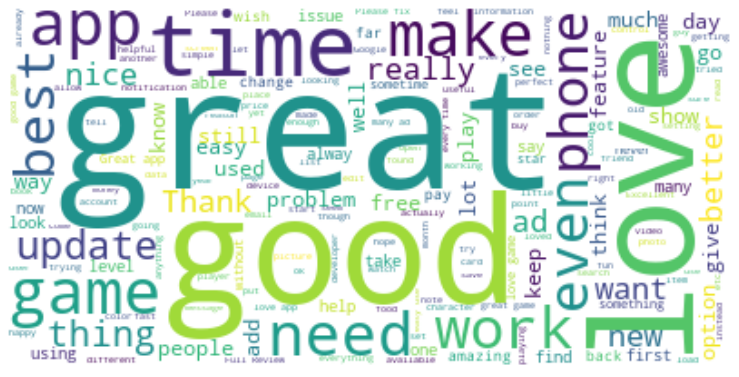

In [122]:
func_select_Category('Positive')

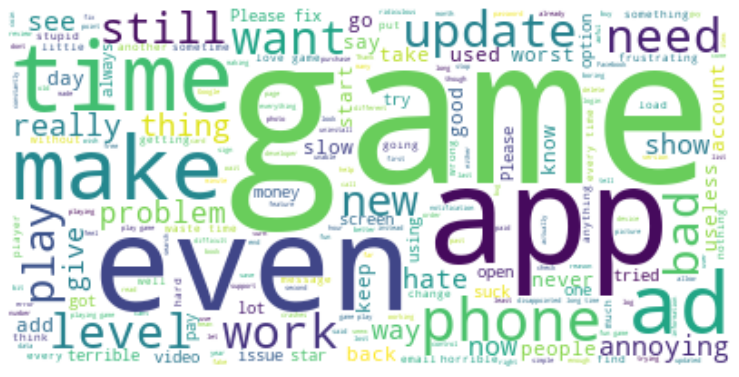

In [123]:
func_select_Category('Negative')

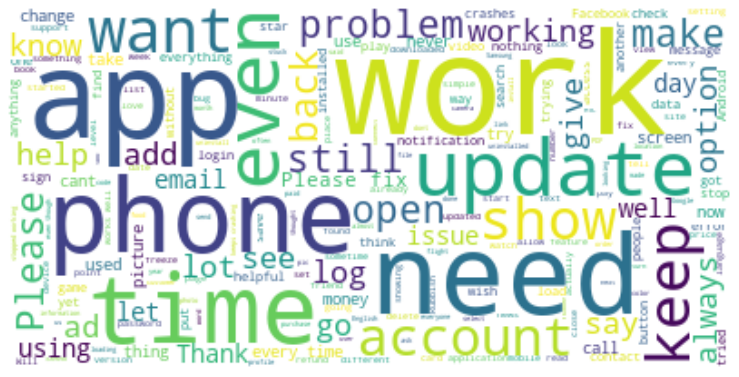

In [124]:
func_select_Category('Neutral')

In [126]:
df_sentiment_app[df_sentiment_app['App']=='Helix Jump']

,App,Sentiment,0
0,Helix Jump,Positive,209
84,Helix Jump,Negative,58
1572,Helix Jump,Neutral,6


In [127]:
df_sentiment_app.shape

(2376, 3)

In [137]:
df_join = df_sentiment_app.merge(df_play_store, left_on='App', right_on='App')

In [138]:
df_join.shape

(2958, 18)

In [139]:
df_join.duplicated().sum()

0

In [142]:
df_join = df_join.drop(columns='Reviews')

In [144]:
df_join.duplicated().sum()

592

In [145]:
df_join = df_join.drop_duplicates()

In [165]:
df_join[df_join['Sentiment']=='Positive']

,App,Sentiment,0,Category,Rating,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_new,installs_new,type_encoded
0,Helix Jump,Positive,209,GAME,4.2,33M,"100,000,000+",Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up,33000000.0,100000000.0,1.0
18,Duolingo: Learn Languages Free,Positive,200,EDUCATION,4.7,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,0.0,100000000.0,1.0
20,Duolingo: Learn Languages Free,Positive,200,FAMILY,4.7,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,0.0,100000000.0,1.0
22,Duolingo: Learn Languages Free,Positive,200,FAMILY,4.7,Varies with device,"100,000,000+",Free,0,Everyone,Education;Education,"August 6, 2018",Varies with device,Varies with device,0.0,100000000.0,1.0
33,Calorie Counter - Macros,Positive,174,HEALTH_AND_FITNESS,4.0,5.5M,"100,000+",Free,0,Everyone,Health & Fitness,"August 27, 2016",2.3.4,5.0 and up,5500000.0,100000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,DashClock Widget,Positive,1,PERSONALIZATION,4.1,1.9M,"1,000,000+",Free,0,Everyone,Personalization,"May 11, 2016",1.7.2,4.2 and up,1900000.0,1000000.0,1.0
2950,GPS Map Free,Positive,1,TRAVEL_AND_LOCAL,4.0,7.6M,"5,000,000+",Free,0,Everyone,Travel & Local,"July 11, 2018",4.6,4.0 and up,7600000.0,5000000.0,1.0
2951,Davis's Drug Guide,Positive,1,MEDICAL,3.9,6.4M,"50,000+",Free,0,Everyone,Medical,"December 11, 2017",2.7.36,4.1 and up,6400000.0,50000.0,1.0
2955,Dashlane Free Password Manager,Positive,1,PRODUCTIVITY,4.6,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,5.0 and up,0.0,1000000.0,1.0


In [164]:
df_join.dropna().corr()

,0,Rating,size_new,installs_new,type_encoded
0,1.000000,0.074942,0.087043,0.169096,0.006554
Rating,0.074942,1.000000,0.033372,0.050436,0.012287
size_new,0.087043,0.033372,1.000000,-0.019361,0.006341
installs_new,0.169096,0.050436,-0.019361,1.000000,-0.024805
type_encoded,0.006554,0.012287,0.006341,-0.024805,1.000000
